$Ejercicio$ $8d$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([2.00, 2.10, 2.20, 2.30, 2.40, 2.50, 2.60, 2.70, 2.80, 2.90, 3.00])
y = np.array([2.78, 3.29, 3.29, 3.33, 3.23, 3.69, 3.46, 3.87, 3.62, 3.40, 3.99])
sigma = 0.3
N = len(x)

In [3]:
Sx  = x.sum()
Sy  = y.sum()
Sxx = np.dot(x, x)
Sxy = np.dot(x, y)

In [4]:
Delta = N * Sxx - Sx**2

In [5]:
a2 = (N * Sxy - Sx * Sy) / Delta
a1 = (Sxx * Sy - Sx * Sxy) / Delta

In [6]:
var_a1 = sigma**2 * Sxx / Delta
var_a2 = sigma**2 * N   / Delta
cov_a1_a2 = -sigma**2 * Sx / Delta

In [7]:
da1 = np.sqrt(var_a1)
da2 = np.sqrt(var_a2)

In [8]:
print(f"a₁ = {a1:.3f} ± {da1:.3f}")
print(f"a₂ = {a2:.3f} ± {da2:.3f}")
print(f"Cov(a₁, a₂) = {cov_a1_a2:.3f}")

a₁ = 1.452 ± 0.721
a₂ = 0.799 ± 0.286
Cov(a₁, a₂) = -0.205


In [9]:
x_line = np.linspace(0, 5, 100)
y_line = a1 + a2 * x_line

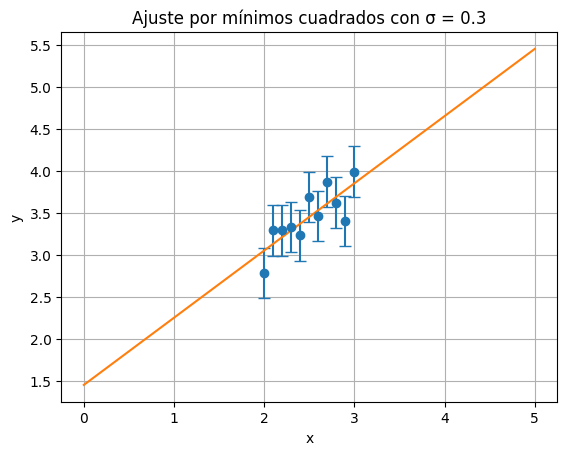

In [10]:
plt.errorbar(x, y, yerr=sigma, fmt='o', capsize=4)
plt.plot(x_line, y_line)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados con σ = 0.3")
plt.grid(True)
plt.show()

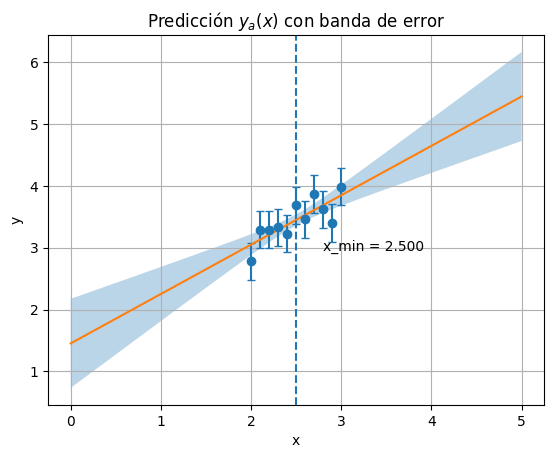

np.float64(2.5)

In [11]:
x_pred = np.linspace(0, 5, 200)
y_pred = a1 + a2 * x_pred
var_y_pred = var_a1 + x_pred**2 * var_a2 + 2 * x_pred * cov_a1_a2
std_y_pred = np.sqrt(var_y_pred)

x_min_error = -cov_a1_a2 / var_a2

plt.errorbar(x, y, yerr=sigma, fmt='o', capsize=3)
plt.plot(x_pred, y_pred)
plt.fill_between(x_pred, y_pred - std_y_pred, y_pred + std_y_pred, alpha=0.3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Predicción $y_a(x)$ con banda de error")
plt.grid(True)

# Mostrar valor de x que minimiza error
plt.axvline(x_min_error, linestyle='--')
plt.annotate(f'x_min = {x_min_error:.3f}', xy=(x_min_error, a1 + a2 * x_min_error),
             xytext=(x_min_error+0.3, a1 + a2 * x_min_error - 0.5))

plt.show()

x_min_error

$e)$

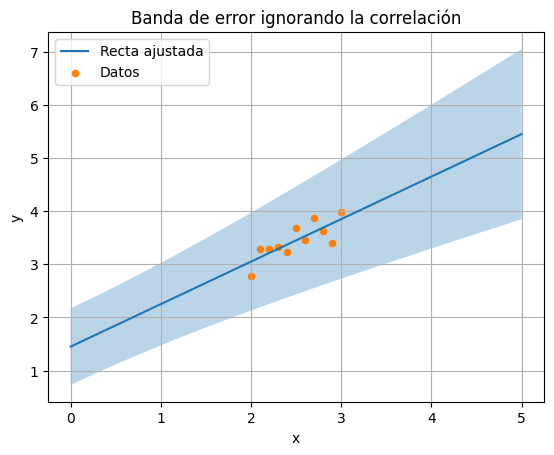

In [12]:

var_a1 = sigma**2 * Sxx / Delta
var_a2 = sigma**2 * N / Delta

x_pred = np.linspace(0, 5, 200)
y_pred = a1 + a2 * x_pred

var_ign = var_a1 + x_pred**2 * var_a2
std_ign = np.sqrt(var_ign)

plt.plot(x_pred, y_pred, label='Recta ajustada')
plt.fill_between(x_pred, y_pred - std_ign, y_pred + std_ign, alpha=0.3)
plt.scatter(x, y, s=20, marker='o', label='Datos')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Banda de error ignorando la correlación")
plt.grid(True)
plt.legend()
plt.show()

$9$

In [17]:
from math import sqrt, exp, pi

In [13]:
x = np.array([2.00, 2.10, 2.20, 2.30, 2.40, 2.50, 2.60, 2.70, 2.80, 2.90, 3.00])
a1_hat = 1.452
a2_hat = 0.799
sigma = 0.3
N = len(x)
xa = 0.5

In [14]:
Sx = x.sum()
Sy = (a1_hat + a2_hat*x).sum()
Sxx = np.dot(x, x)
Sxy = np.dot(x, a1_hat + a2_hat*x)
Delta = N * Sxx - Sx**2

In [15]:
var_a1 = sigma**2 * Sxx / Delta
var_a2 = sigma**2 * N / Delta
cov_a1_a2 = -sigma**2 * Sx / Delta

In [18]:
ya_mean = a1_hat + a2_hat * xa
ya_var_theoretical = var_a1 + xa**2 * var_a2 + 2 * xa * cov_a1_a2
ya_std_theoretical = sqrt(ya_var_theoretical)

In [19]:
num_sim = 1000
ya_sim = np.zeros(num_sim)


for i in range(num_sim):
    # generar yi
    y_sim = np.random.normal(a1_hat + a2_hat * x, sigma)
    # ajuste LS a los datos simulados
    Sx_sim = x.sum()
    Sy_sim = y_sim.sum()
    Sxx_sim = np.dot(x, x)
    Sxy_sim = np.dot(x, y_sim)
    Delta_sim = N * Sxx_sim - Sx_sim**2
    a2_sim = (N * Sxy_sim - Sx_sim * Sy_sim) / Delta_sim
    a1_sim = (Sxx_sim * Sy_sim - Sx_sim * Sxy_sim) / Delta_sim
    # predecir ya
    ya_sim[i] = a1_sim + a2_sim * xa

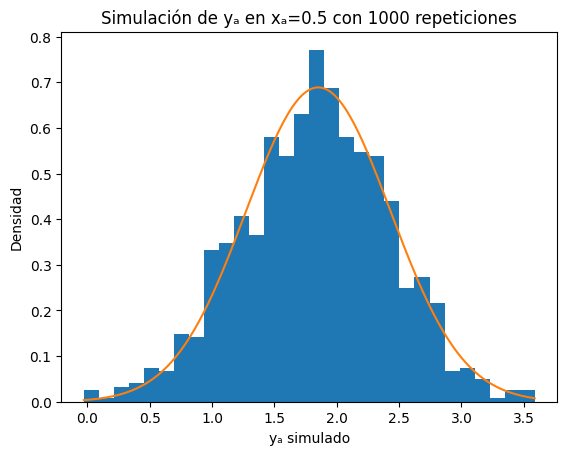

In [20]:
plt.hist(ya_sim, bins=30, density=True)
x_vals = np.linspace(min(ya_sim), max(ya_sim), 200)
pdf = [(1/(ya_std_theoretical*sqrt(2*pi))) * exp(-0.5*((xv-ya_mean)/ya_std_theoretical)**2) for xv in x_vals]
plt.plot(x_vals, pdf)
plt.xlabel("yₐ simulado")
plt.ylabel("Densidad")
plt.title("Simulación de yₐ en xₐ=0.5 con 1000 repeticiones")
plt.show()

$10)$

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [22]:
data = {
    'I':  {'x': [10,8,13,9,11,14,6,4,12,7,5],
           'y': [8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68]},
    'II': {'x': [10,8,13,9,11,14,6,4,12,7,5],
           'y': [9.14,8.14,8.74,8.77,9.26,8.10,6.13,3.10,9.13,7.26,4.74]},
    'III':{'x': [10,8,13,9,11,14,6,4,12,7,5],
           'y': [7.46,6.77,12.74,7.11,7.81,8.84,6.08,5.39,8.15,6.42,5.73]},
    'IV': {'x': [ 8,8,8,8,8,8,8,19,8,8,8],
           'y': [6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89]},
}

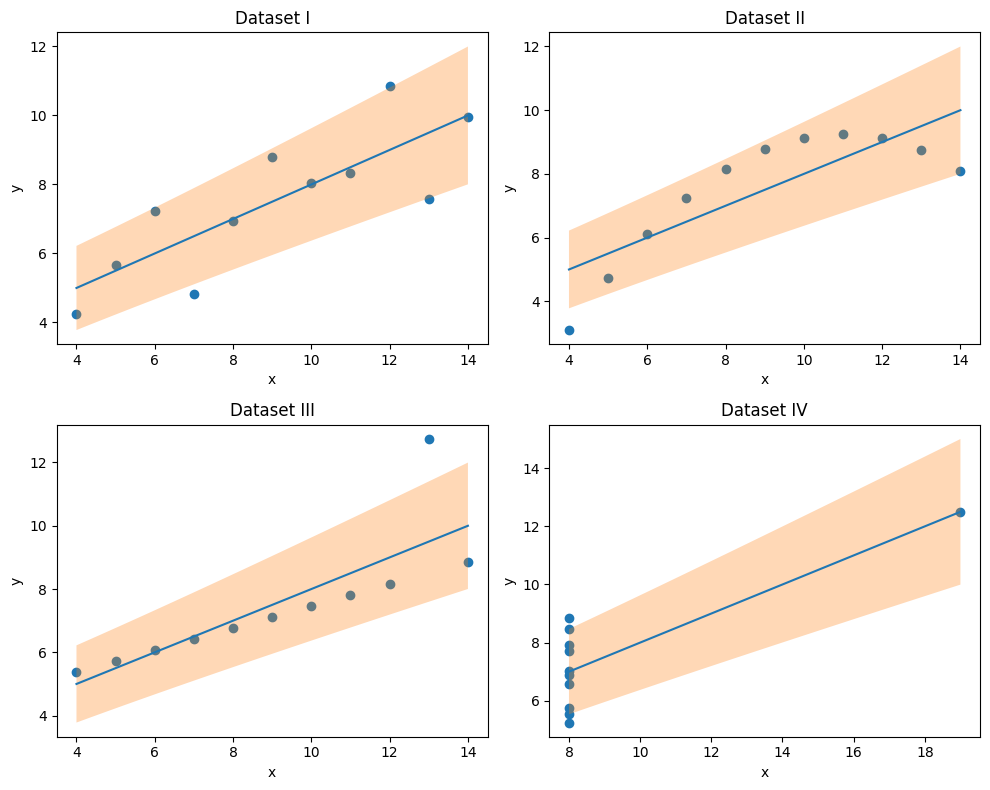

,Dataset,Intercept,Error Intercept,Slope,Error Slope
0,I,3.000091,1.124747,0.500091,0.117906
1,II,3.000909,1.125302,0.500000,0.117964
2,III,3.002455,1.124481,0.499727,0.117878
3,IV,3.001727,1.123921,0.499909,0.117819


In [25]:

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

results = []

for i, name in enumerate(['I','II','III','IV']):
    ax = axes[i]
    x = np.array(data[name]['x'])
    y = np.array(data[name]['y'])
    
    # Ajuste lineal con covarianza
    p, cov = np.polyfit(x, y, 1, cov=True)
    slope, intercept = p
    var_slope, var_intercept = cov[0,0], cov[1,1]
    err_slope, err_intercept = np.sqrt(var_slope), np.sqrt(var_intercept)
    
    # Guardar resultados
    results.append({
        'Dataset': name,
        'Intercept': intercept,
        'Error Intercept': err_intercept,
        'Slope': slope,
        'Error Slope': err_slope
    })
    
    # Graficar puntos y recta de ajuste
    ax.scatter(x, y)
    x_line = np.linspace(min(x), max(x), 100)
    y_line = intercept + slope * x_line
    ax.plot(x_line, y_line)
    
    # Banda de error de predicción (solo varianza de parámetros)
    # para ilustrar se usa Var(a0)+x^2 Var(a1)
    var_y = var_intercept + x_line**2 * var_slope
    dy = np.sqrt(var_y)
    ax.fill_between(x_line, y_line-dy, y_line+dy, alpha=0.3)
    
    ax.set_title(f"Dataset {name}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

plt.tight_layout()
plt.show()

# Mostrar tabla de resultados
pd.DataFrame(results)